In [1]:
import os
import pickle
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vit_keras import vit, utils, visualize
from tensorflow.keras.mixed_precision import experimental as mixed_precision

In [2]:
csv_path = './datasets/birds/birds.csv'
base_path = './datasets/birds/'

df = pd.read_csv(csv_path, index_col=0)

id2label = pickle.load(open('checkpoints/vit_model/id2label.pkl', 'rb'))
num_classes = len(set(df['labels'].tolist()))
df.head()

,filepaths,labels,data set
0,train\AFRICAN CROWNED CRANE\001.jpg,AFRICAN CROWNED CRANE,train
1,train\AFRICAN CROWNED CRANE\002.jpg,AFRICAN CROWNED CRANE,train
2,train\AFRICAN CROWNED CRANE\003.jpg,AFRICAN CROWNED CRANE,train
3,train\AFRICAN CROWNED CRANE\004.jpg,AFRICAN CROWNED CRANE,train
4,train\AFRICAN CROWNED CRANE\005.jpg,AFRICAN CROWNED CRANE,train


In [3]:
img_size = 224

def create_model():
    vit_model = vit.vit_b16(
        activation='softmax',
        pretrained=True,
        include_top=True,
        pretrained_top=False,
        classes=num_classes
    )
    return vit_model

model = create_model()
model.load_weights('./checkpoints/vit_model')

C:\Users\mahoto\Anaconda3\envs\tensorflow\lib\site-packages\vit_keras\utils.py:77: UserWarning: Resizing position embeddings from 24 to 14
  warnings.warn(


Predict Label is NORTHERN SHOVELER: confidence: 0.9990153312683105
Image Label is    NORTHERN SHOVELER


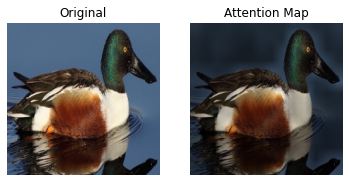

In [9]:
import random
from PIL import Image

train_df = df[df['data set'] == 'train']
valid_df = df[df['data set'] == 'test'].sample(frac=1)


fig, (ax1, ax2) = plt.subplots(ncols=2)
for image_path in valid_df['filepaths'].tolist()[:1]:
    image = utils.read(base_path+image_path.replace('\\', '/'), img_size)

    predict = model(vit.preprocess_inputs(image)[np.newaxis])
    attention_map = visualize.attention_map(model=model, image=image)

    ax1.axis('off')
    ax2.axis('off')
    ax1.set_title('Original')
    ax2.set_title('Attention Map')
    _ = ax1.imshow(image)
    _ = ax2.imshow(attention_map)

    predict_label = id2label[np.argmax(predict, axis=1)[0]]
    label_confidence = np.max(predict, axis=1)[0]
    print(f'Predict Label is {predict_label}: confidence: {label_confidence}')
    print('Image Label is   ', image_path.split('\\')[1])